# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Import dataset

In [3]:
data = pd.read_csv('D:\\Projects\\ML_Projects\\notebook\\data\\StudentsPerformance.csv')

# Showing top 5 records

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing X and Y variables

In [11]:
X = data.drop(columns=['math score'],axis=1)
y = data['math score']

In [12]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [13]:
print("Categories in Gender variable:",end=" ")
print(data['gender'].unique())

print("Categories in race/ethnicity variable:",end=" ")
print(data['race/ethnicity'].unique())

print("Categories in lunch variable:",end=" ")
print(data['lunch'].unique())

print("Categories in Test Preparation Course variable:",end=" ")
print(data['test preparation course'].unique())

Categories in Gender variable: ['female' 'male']
Categories in race/ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in lunch variable: ['standard' 'free/reduced']
Categories in Test Preparation Course variable: ['none' 'completed']


In [14]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

# Creating column Transformer with 3 types of transformers

In [15]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


In [17]:
preprocessor = ColumnTransformer(
[
    ("OneHotEncoder",oh_transformer, cat_features),
    ("StandardScaler",numeric_transformer, num_features),
])

In [19]:
X = preprocessor.fit_transform(X)

In [20]:
X.shape

(1000, 19)

In [22]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

# Creating an Evaluation function which give all metrics after model Training

In [23]:
def evaluate_model(true,predicted):
    mae= mean_absolute_error(true,predicted)
    mse= mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    # Making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluation and prediction
    model_train_mae, model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for training set")
    print(" Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print(" Mean Squared Error: {:.4f}".format(model_train_mae))
    print(" R2 Score: {:.4f}".format(model_train_r2))
    
    print("-----------------------------------------------------")
    
    print("Model performance for testing set")
    print(" Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print(" Mean Squared Error: {:.4f}".format(model_test_mae))
    print(" R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for training set
 Root Mean Squared Error: 5.3261
 Mean Squared Error: 4.2744
 R2 Score: 0.8742
-----------------------------------------------------
Model performance for testing set
 Root Mean Squared Error: 5.4006
 Mean Squared Error: 4.2202
 R2 Score: 0.8801


Lasso
Model performance for training set
 Root Mean Squared Error: 6.5938
 Mean Squared Error: 5.2063
 R2 Score: 0.8071
-----------------------------------------------------
Model performance for testing set
 Root Mean Squared Error: 6.5197
 Mean Squared Error: 5.1579
 R2 Score: 0.8253


Ridge
Model performance for training set
 Root Mean Squared Error: 5.3233
 Mean Squared Error: 4.2650
 R2 Score: 0.8743
-----------------------------------------------------
Model performance for testing set
 Root Mean Squared Error: 5.3904
 Mean Squared Error: 4.2111
 R2 Score: 0.8806


K-Neighbors Regressor
Model performance for training set
 Root Mean Squared Error: 5.7084
 Mean Squared Error: 4.5160
 R2

# Results

In [28]:
pd.DataFrame(list(zip(model_list,r2_list)),columns = ['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880138
5,Random Forest,0.856482
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.846340
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.757026


# Linear Regression

In [29]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.01


# Plotting

Text(0, 0.5, 'Predicted')

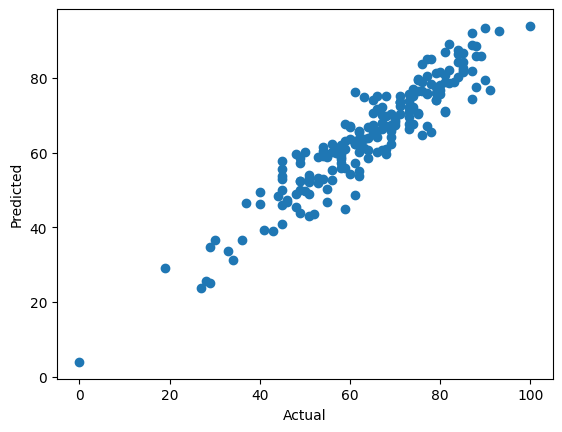

In [30]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<AxesSubplot: xlabel='math score'>

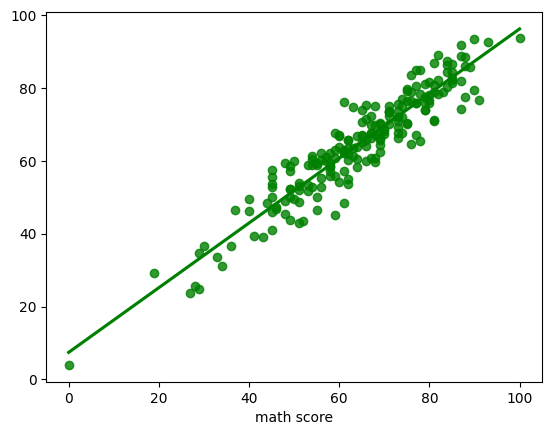

In [33]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='green')

# Difference between actual and predicted value

In [34]:
pred = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred

,Actual Value,Predicted Value,Difference
521,91,76.628906,14.371094
737,53,58.781250,-5.781250
740,80,76.812500,3.187500
660,74,76.890625,-2.890625
411,84,87.546875,-3.546875
...,...,...,...
408,52,43.445312,8.554688
332,62,62.015625,-0.015625
208,74,67.765625,6.234375
613,65,67.250000,-2.250000
